<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display column names
print("Column Names:")
print(df.columns)

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# Display summary information about the dataset
print("\nSummary Information:")
print(df.info())

# Display the shape of the dataset
print("\nDataset Shape:")
print(df.shape)

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Dat

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
## Write your code here
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Remove rows with missing values
df_cleaned = df.dropna()

Missing Values per Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here
# Calculate value counts for Employment
print("Employment Value Counts:")
print(df['Employment'].value_counts())

# Calculate value counts for JobSat
print("\nJobSat Value Counts:")
print(df['JobSat'].value_counts())

# Calculate value counts for YearsCodePro
print("\nYearsCodePro Value Counts:")
print(df['YearsCodePro'].value_counts())

Employment Value Counts:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking fo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


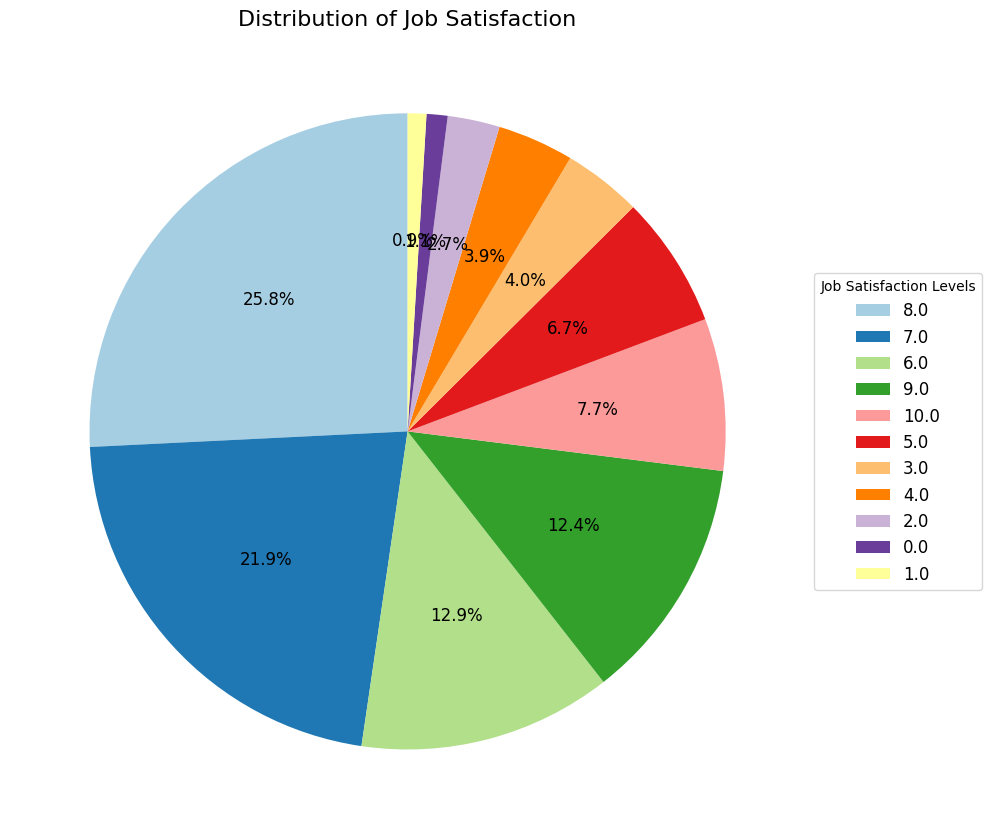

In [8]:
import matplotlib.pyplot as plt

# Calculate the frequency of each category in JobSat
job_sat_counts = df['JobSat'].value_counts()

# Create a pie chart with improved readability
plt.figure(figsize=(10, 10))  # Larger figure size for clarity
plt.pie(job_sat_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})
plt.title('Distribution of Job Satisfaction', fontsize=16)

# Add a legend outside the pie chart for category labels
plt.legend(job_sat_counts.index, title="Job Satisfaction Levels", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


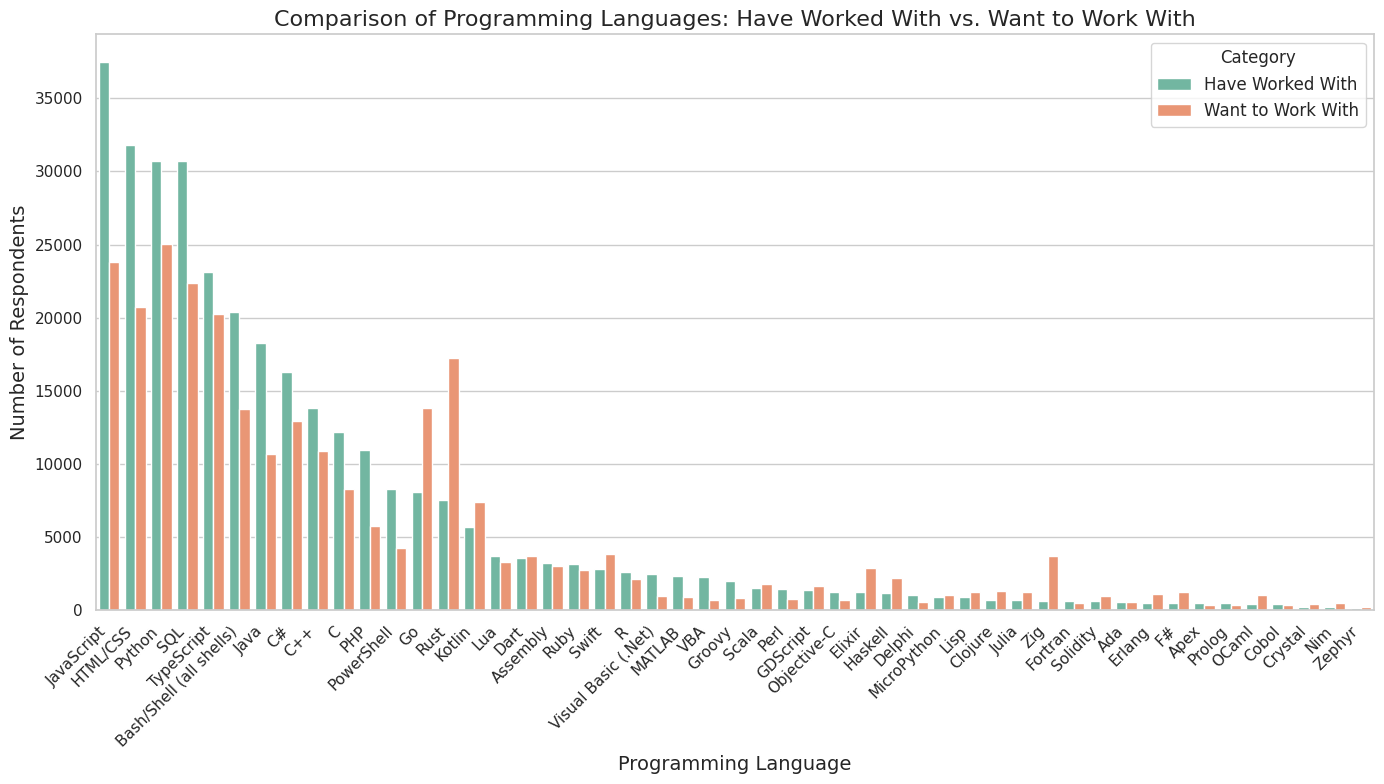

In [11]:
import pandas as pd
from collections import Counter  # Import Counter to fix the NameError
import matplotlib.pyplot as plt
import seaborn as sns

# Function to split and count languages
def count_languages(series):
    languages = series.str.split(';').explode()
    language_counts = Counter(languages)
    return language_counts

# Count languages for both columns
have_worked_with_counts = count_languages(df['LanguageHaveWorkedWith'])
want_to_work_with_counts = count_languages(df['LanguageWantToWorkWith'])

# Get all unique languages from both columns
all_languages = list(set(have_worked_with_counts.keys()) | set(want_to_work_with_counts.keys()))

# Create a DataFrame with frequencies for plotting
plot_data = pd.DataFrame({
    'Language': all_languages,
    'Have Worked With': [have_worked_with_counts.get(lang, 0) for lang in all_languages],
    'Want to Work With': [want_to_work_with_counts.get(lang, 0) for lang in all_languages]
})

# Sort the DataFrame by 'Have Worked With' frequency in descending order
plot_data = plot_data.sort_values(by='Have Worked With', ascending=False)

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the grouped bar plot
plt.figure(figsize=(14, 8))
plot_data_melted = plot_data.melt(id_vars='Language', var_name='Category', value_name='Count')
sns.barplot(x='Language', y='Count', hue='Category', data=plot_data_melted, palette='Set2')

# Customize the plot
plt.title('Comparison of Programming Languages: Have Worked With vs. Want to Work With', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Category', fontsize=12)  # Add legend with title
plt.tight_layout()  # Adjust layout to prevent clipping

# Display the plot
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


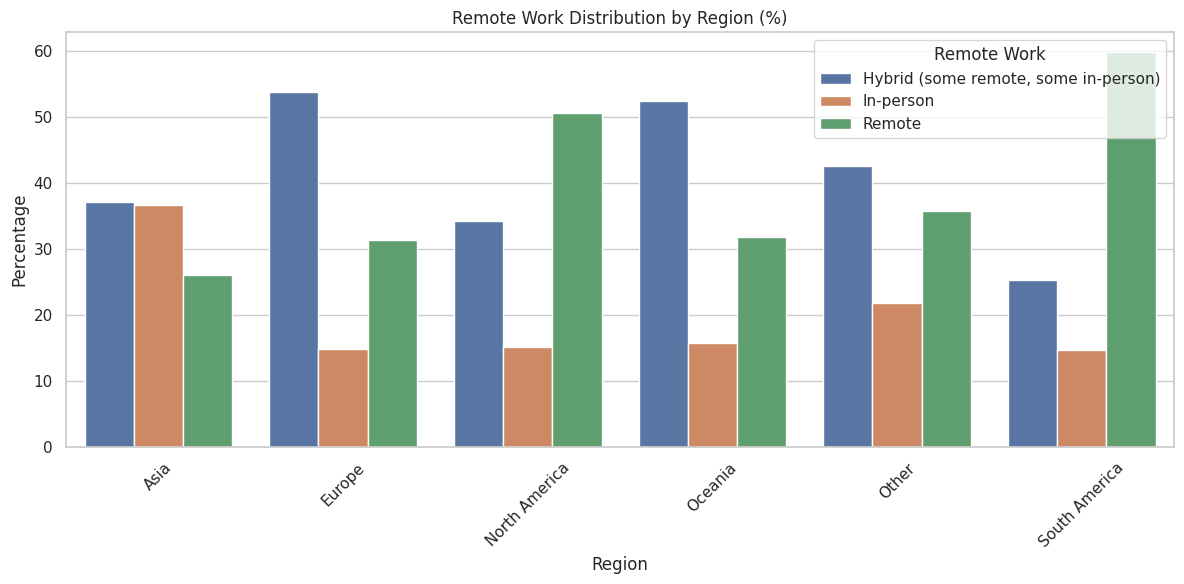

In [12]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define a partial country-to-region mapping (extend as needed)
region_mapping = {
    'United States of America': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Australia': 'Oceania'
}

# Step 2: Add 'Region' column to the DataFrame
df['Region'] = df['Country'].map(region_mapping).fillna('Other')

# Step 3: Group by 'Region' and 'RemoteWork' and count respondents
remote_work_by_region = df.groupby(['Region', 'RemoteWork']).size().unstack(fill_value=0)

# Step 4: Compute percentages within each region
remote_work_by_region_pct = remote_work_by_region.div(remote_work_by_region.sum(axis=1), axis=0) * 100

# Step 5: Melt the DataFrame for seaborn compatibility
remote_work_by_region_pct_melted = remote_work_by_region_pct.reset_index().melt(
    id_vars='Region', 
    var_name='RemoteWork', 
    value_name='Percentage'
)

# Step 6: Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Percentage', hue='RemoteWork', data=remote_work_by_region_pct_melted)
plt.title('Remote Work Distribution by Region (%)')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.legend(title='Remote Work')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [14]:
## Write your code here
import pandas as pd
!pip install scipy
from scipy.stats import spearmanr

# Load the dataset (assuming 'df' is the DataFrame containing the Stack Overflow survey data)
# df = pd.read_csv('survey_data.csv')

# Step 1: Encode JobSat into numerical values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neutral': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_encoded'] = df['JobSat'].map(job_sat_mapping)

# Step 2: Handle missing values
df_clean = df.dropna(subset=['JobSat_encoded', 'YearsCodePro'])

# Step 3: Calculate Spearman correlation
correlation, p_value = spearmanr(df_clean['JobSat_encoded'], df_clean['YearsCodePro'])

# Step 4: Display and interpret the result
print(f"Spearman correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

if correlation > 0:
    print("There is a positive correlation between years of professional coding experience and job satisfaction.")
elif correlation < 0:
    print("There is a negative correlation between years of professional coding experience and job satisfaction.")
else:
    print("There is no correlation between years of professional coding experience and job satisfaction.")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 177.8 MB/s eta 0:00:0000:01
Spearman correlation coefficient: nan
P-value: nan
There is no correlation between years of professional coding experience and job satisfaction.
The correlation is not statistically significant.


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


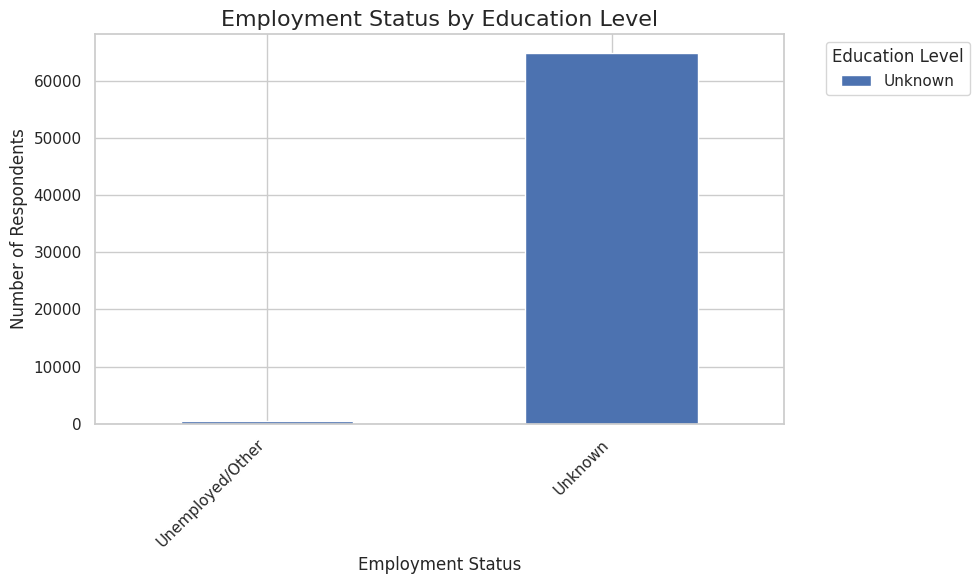

In [21]:

# df = pd.read_csv('survey_data.csv')

# Define mappings for education levels and employment statuses
edlevel_mapping = {
    'Less than high school': 'No college degree',
    'High school': 'No college degree',
    'Some college': 'No college degree',
    'Associate degree': 'No college degree',
    'Bachelor’s degree': 'Bachelor’s degree',
    'Master’s degree': 'Advanced degree',
    'Doctorate': 'Advanced degree',
    'Professional degree': 'Advanced degree'
}

employment_mapping = {
    'Employed full-time': 'Employed',
    'Employed part-time': 'Employed',
    'Freelancer': 'Freelancer/Contractor',
    'Independent contractor': 'Freelancer/Contractor',
    'Student': 'Student',
    'Unemployed': 'Unemployed/Other',
    'Retired': 'Unemployed/Other'
}

# Apply mappings to group education levels and employment statuses
df['EdLevel_grouped'] = df['EdLevel'].map(edlevel_mapping).fillna('Unknown')
df['Employment_grouped'] = df['Employment'].map(employment_mapping).fillna('Unknown')

# Create a cross-tabulation of grouped employment and education levels
crosstab_grouped = pd.crosstab(df['Employment_grouped'], df['EdLevel_grouped'])

# Plot a stacked bar chart
crosstab_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Employment Status by Education Level', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()

# Display the plot
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [22]:
## Write your code here
df.to_csv('cleaned_dataset.csv', index=False)
print("Dataset exported successfully to 'cleaned_dataset.csv'")

Dataset exported successfully to 'cleaned_dataset.csv'


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
